# CAMS Global reanalysis data demo

## Introduction

This notebook demonstrates opening and plotting data from the Copernicus Atmosphere Monitoring Service (CAMS):
 - CAMS Global reanalysis (EA4C)

Data have been extracted for areas surrounding the four HARMONIA target cities: Milan, Piraeus, Ixelles and Sofia

All the data have been pre-processed to mass concentrations in $\mu \text{g}\, \text{m}^{-3}$

 
###  CAMS Global reanalysis (EA4C)

Currently available from 2003 to June 2022 (CAMS will produce more recent data)

0.75 degrees Horizontal resolution

3 hourly temopral resolution
 
 
## Parameters of particular interest

Some key air quality parameters that are subject to targets/directives/standards/guidlines:
 - pm2p5 : Particulate matter d <= 2.5 um
 - pm10  : Particulate matter d <= 10 um
 - co    : Carbon monoxide mass concentration
 - no2   : Nitrogen dioxide mass concentration
 - no    : Nitrogen monoxide mass concentration
 - go3   : Ozone mass concentration


<font size="1"> *This notebook contains modified Copernicus Atmosphere Monitoring Service information [2023]. Neither the European Commission nor ECMWF is responsible for any use that may be made of the
Copernicus information or data it contains* </font>.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr

## The Harmonia cities

In [2]:
cities = ['Piraeus', 'Ixelles', 'Sofia', 'Milan']
## Chose one of the cities above
city = 'Milan'

## Open the CAMS Global reanalysis dataset for the chosen city

Get an xarray containing the data for the selected city

In [3]:
data_dir = f"data/cams_global_reanalysis_eac4/{city}"
## The data are in multiple files, one per year. We can open them all together.
files = f"{data_dir}/cams_global_reanalysis_concentrations_*.nc"

## You can open data for just one year. Uncomment the two lines below below
# year = 2020
# files = f"{data_dir}/cams_global_reanalysis_concentrations_{year}.nc"

## Open the data as an xarray
data = xr.open_mfdataset(files)

### Quick look at variables in the data set

In [4]:
# List the variables available in the data set
all_variables = list(data.keys())
print("Available variables :\n", all_variables)

Available variables :
 ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']


In [5]:
# and the metadata for one of the variables
AQ_var = 'pm2p5'
print(f"\n metadata for {AQ_var} :\n",data[AQ_var].attrs)


 metadata for pm2p5 :
 {'units': 'ug m**-3', 'long_name': 'Particulate matter d <= 2.5 um', 'standard_name': 'mass_concentration_of_pm2p5_ambient_aerosol_particles_in_air'}


### A closer look at the variables in the data set
Print the metadata for all of the variables \
The concentrations are in $\mu \text{g}\, \text{m}^{-3}$

In [6]:
# Print the variables available in the data set
print(f"Available variables: {all_variables}\n")
print(f"Name  : (units)     Long name                            Standard name")
print(f"----------------------------------------------------------------------------------------")
for var in data.keys():
    spaces1 = ' '*(9 - len(data[var].attrs['units']))
    spaces2 = ' '*(35 - len(data[var].attrs['long_name']))
    print(f"{var:6}: ({data[var].attrs['units']}){spaces1} {data[var].attrs['long_name']} {spaces2}: {data[var].attrs['standard_name']}")


Available variables: ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']

Name  : (units)     Long name                            Standard name
----------------------------------------------------------------------------------------
co    : (ug m**-3)  Carbon monoxide mass concentration  : mass_concentration_of_carbon_monoxide_in_air
no2   : (ug m**-3)  Nitrogen dioxide mass concentration : mass_concentration_of_nitrogen_dioxide_in_air
no    : (ug m**-3)  Nitrogen monoxide mass concentration : mass_concentration_of_nitrogen_monoxide_in_air
go3   : (ug m**-3)  Ozone mass concentration (full chemistry scheme) : mass_concentration_of_ozone_in_air
pan   : (ug m**-3)  Peroxyacetyl nitrate                : mass_concentration_of_peroxyacetyl_nitrate_in_air
so2   : (ug m**-3)  Sulphur dioxide mass concentration  : mass_concentration_of_sulfur_dioxide_in_air
pm10  : (ug m**-3)  Particulate matter d <= 10 um       : mass_concentration_of_pm10_ambient_aerosol_particles_in_air
pm2p5 : (ug m

## Plot timeseries of concentrations for the city

Some formated labels to use in plotting

In [7]:
# formatted Labels for plots
labels = {'pm10':r"PM$_{10}$",
          'pm2p5':r"PM$_{2.5}$",
          'co': "CO",
          'no2': r"NO$_{2}$",
          'no': "NO",
          'go3': r"Ground Ozone", 
          'pan': "PAN",
          'so2': r"SO$_{2}$"}
# and for units
unit = r"$\mu g \ m ^{-3}$" 

### Plot the whole timeseries for one point

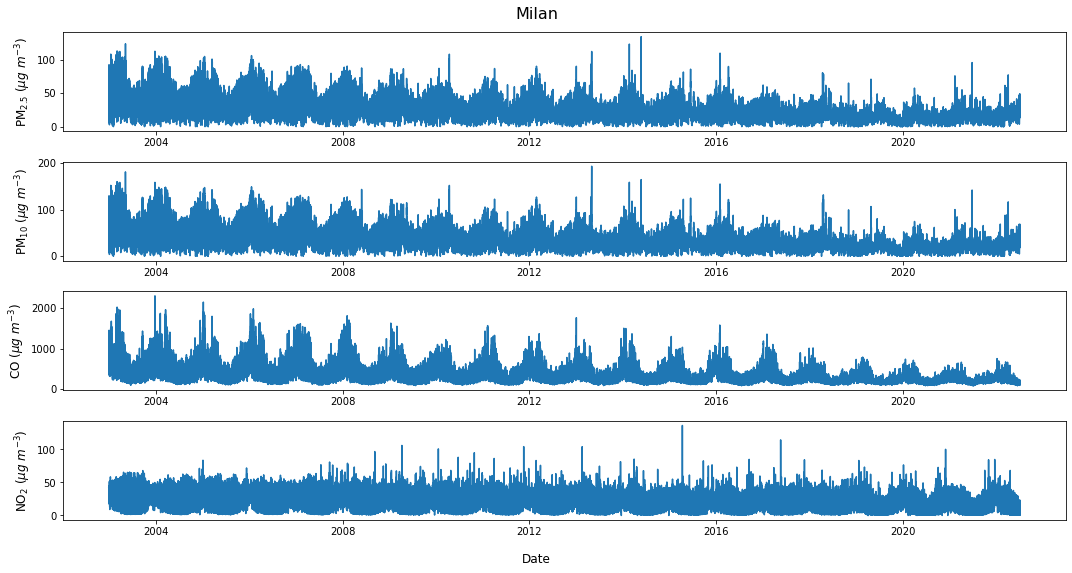

In [8]:
AQ_vars_to_plot = ['pm2p5', 'pm10', 'co', 'no2']

## Select one location
point = data.isel({'latitude':1, 'longitude':1})

fig, axs = plt.subplots(len(AQ_vars_to_plot), 1, figsize = (15, 2*len(AQ_vars_to_plot)))
for ax, variable in zip(axs.flatten(), AQ_vars_to_plot):
    ax.plot(point.time, point[variable])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)

fig.supxlabel("Date", size=12)
fig.suptitle(city, fontsize=16)
fig.tight_layout()

### Plot data for one year

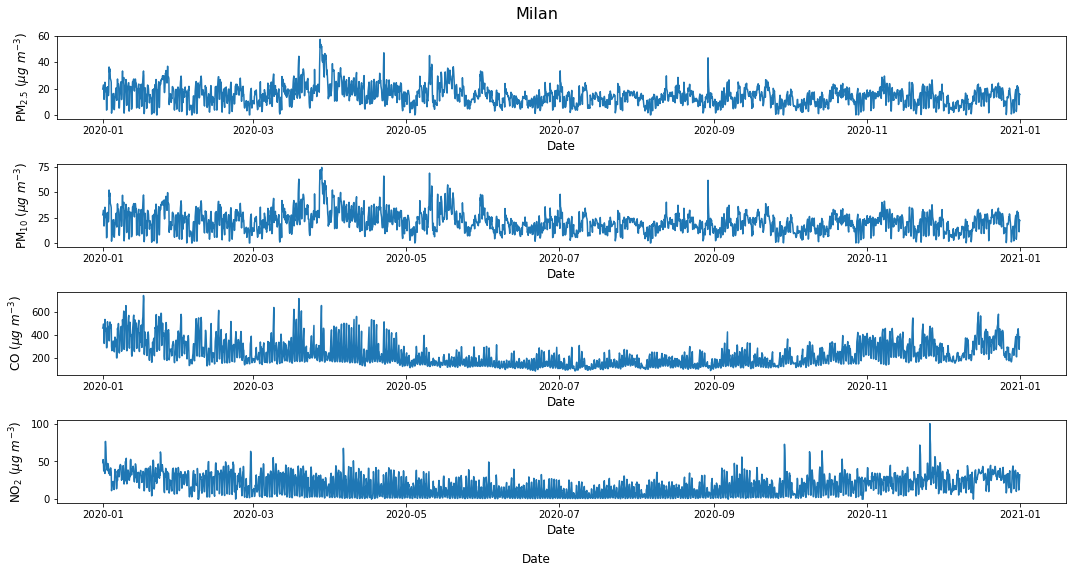

In [9]:
AQ_vars_to_plot = ['pm2p5', 'pm10', 'co', 'no2']

## Select one location
point = data.isel({'latitude':1, 'longitude':1})

## Identify data in year
year = 2020
in_year = data.time.dt.year == year

fig, axs = plt.subplots(len(AQ_vars_to_plot), 1, figsize = (15, 2*len(AQ_vars_to_plot)))

for ax, variable in zip(axs.flatten(),  AQ_vars_to_plot):
    ax.plot(point.time[in_year], point[variable][in_year])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.supxlabel("Date", size=12)
fig.suptitle(city, fontsize=16)
fig.tight_layout()